# **Simulazione F-MACURA**


## **Solar Penalty and Comfort Reward**

----

In [1]:
# Forza l'ambiente corretto per CityLearn e Hydra su Colab
!pip uninstall -y numpy tensorboard tensorflow
!pip install numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install tensorboard==2.12.3
!pip install hydra-core
!pip install citylearn
!pip install omegaconf
!pip install colorednoise
!pip install mujoco

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 117.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.23.5 

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 38.6 MB/s eta 0:00:0

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Lista degli import**

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/src')

from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import *
from citylearn.wrappers import *
from utils import plotting_functions as plt
#import per strutture dati
import pandas as pd
from datetime import datetime

#import per grafici
from IPython.display import display, Markdown

#import per l'utilizzo degli agenti model based
# Inizializza Hydra in modalità programmatica
from hydra import initialize, compose
import numpy as np
import omegaconf
import torch

import sys, os, shutil

os.chdir('/content/drive/MyDrive/Colab Notebooks/src/agents/model_based')





import agents.model_based.mbrl.algorithms.fmacura as fmacura
import agents.model_based.mbrl.util.env as env_util
import importlib
importlib.reload(fmacura)

<module 'agents.model_based.mbrl.algorithms.fmacura' from '/content/drive/MyDrive/Colab Notebooks/src/agents/model_based/mbrl/algorithms/fmacura.py'>

In [3]:
def run(cfg: omegaconf.DictConfig, test_cfg: omegaconf.DictConfig = None):

    print(f"Using the following algorithm: {cfg.algorithm.name}!")

    env, term_fn, reward_fn = env_util.EnvHandler.make_env(cfg, test_env=False)
    distance_env, *_ = env_util.EnvHandler.make_env(cfg, test_env=True)
    print(f"Using the following reward function: {reward_fn.__class__.__name__}")
    np.random.seed(cfg.seed)
    torch.manual_seed(cfg.seed)
    test_env, *_ = env_util.EnvHandler.make_env(test_cfg, test_env=True)
    fmacura.train(env, test_env,distance_env, term_fn, cfg, work_dir="./exp/fmacura")
    return env,test_env,distance_env


from hydra.core.global_hydra import GlobalHydra
GlobalHydra.instance().clear()

initialize(config_path="./mbrl/examples/conf")  # Specifica il percorso della configurazione
cfg = compose(config_name="main_fmacura")  # Carica il file di configurazione principale
test_cfg = compose(config_name="test_macura")  # Carica il file di configurazione per il test

[shutil.rmtree(p) if os.path.isdir(p) else os.unlink(p) for p in [os.path.join('./exp/fmacura', f) for f in os.listdir('./exp/fmacura')]]

# Esegui la funzione principale
print(cfg.overrides.num_steps)
env, test_env, distance_env = run(cfg, test_cfg)

4060
Using the following algorithm: macura!


INFO:root:The dataset names DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/dataset_names.json. Next time DataSet.get_dataset_names is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The citylearn_challenge_2023_phase_2_local_evaluation dataset DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/datasets. Next time DataSet.get_dataset('citylearn_challenge_2023_phase_2_local_evaluation') is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The PV sizing data DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/misc. Next time DataSet.get_pv_sizing_data is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The ba

Output streaming troncato alle ultime 5000 righe.
355250
Dynamic updates:  15
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Total num stored:  851522
1065750
355250
Dynamic updates:  15
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct size
Updating
Correct size
Correct size
Correct s


----

## **Confronto con Baseline**



In [4]:
env = env.unwrapped
eval_env = test_env.unwrapped
display(eval_env.time_step)
print(eval_env.reward_function)


2207

In [5]:
# Vengono filtrare le cost_function desiderate
kpis_names = { 'electricity_consumption_total':'Consumo totale della rete',
               'carbon_emissions_total':'Emissioni',
              'discomfort_proportion':'Proporzione del tempo fuori dal comfort',
              'daily_peak_minus_load_factor_average': 'Misura dell inefficenza nell uso giornaliero della potenza disponibile',
              'daily_peak_average': 'Picco medio giornaliero',
              'all_time_peak_average': 'picco massimo dei consumi nel distretto',
              'one_minus_thermal_resilience_proportion': 'Discomfort proportion in interruzioni elettriche',
              'power_outage_normalized_unserved_energy_total': 'domanda non soddisfatta a causa di carenza di energia',
              'ramping_average': 'differenza media tra consumo al timestep corrente al precedente ',
              #Qua si aggiungono cost_function
}


kpis = eval_env.evaluate()
kpis = kpis[(kpis['cost_function'].isin(kpis_names))].dropna()
kpis = kpis.pivot(index='cost_function', columns='name', values='value').round(3)
display(kpis)



name                                           Building_1  Building_2  \
cost_function                                                           
all_time_peak_average                                 NaN         NaN   
carbon_emissions_total                              1.214       1.516   
daily_peak_average                                    NaN         NaN   
discomfort_proportion                               0.708       0.825   
electricity_consumption_total                       1.218       1.523   
one_minus_thermal_resilience_proportion             0.154       0.923   
power_outage_normalized_unserved_energy_total       0.630       0.614   
ramping_average                                       NaN         NaN   

name                                           Building_3  District  
cost_function                                                        
all_time_peak_average                                 NaN     1.065  
carbon_emissions_total                              0.896     1.209  
daily_peak_average                                    NaN     1.051  
discomfort_proportion                               0.710     0.748  
electricity_consumption_total                       0.906     1.215  
one_minus_thermal_resilience_proportion             1.000     0.692  
power_outage_normalized_unserved_energy_total       0.311     0.518  
ramping_average                                       NaN     1.231


------

## **Comportamento dei consumi**

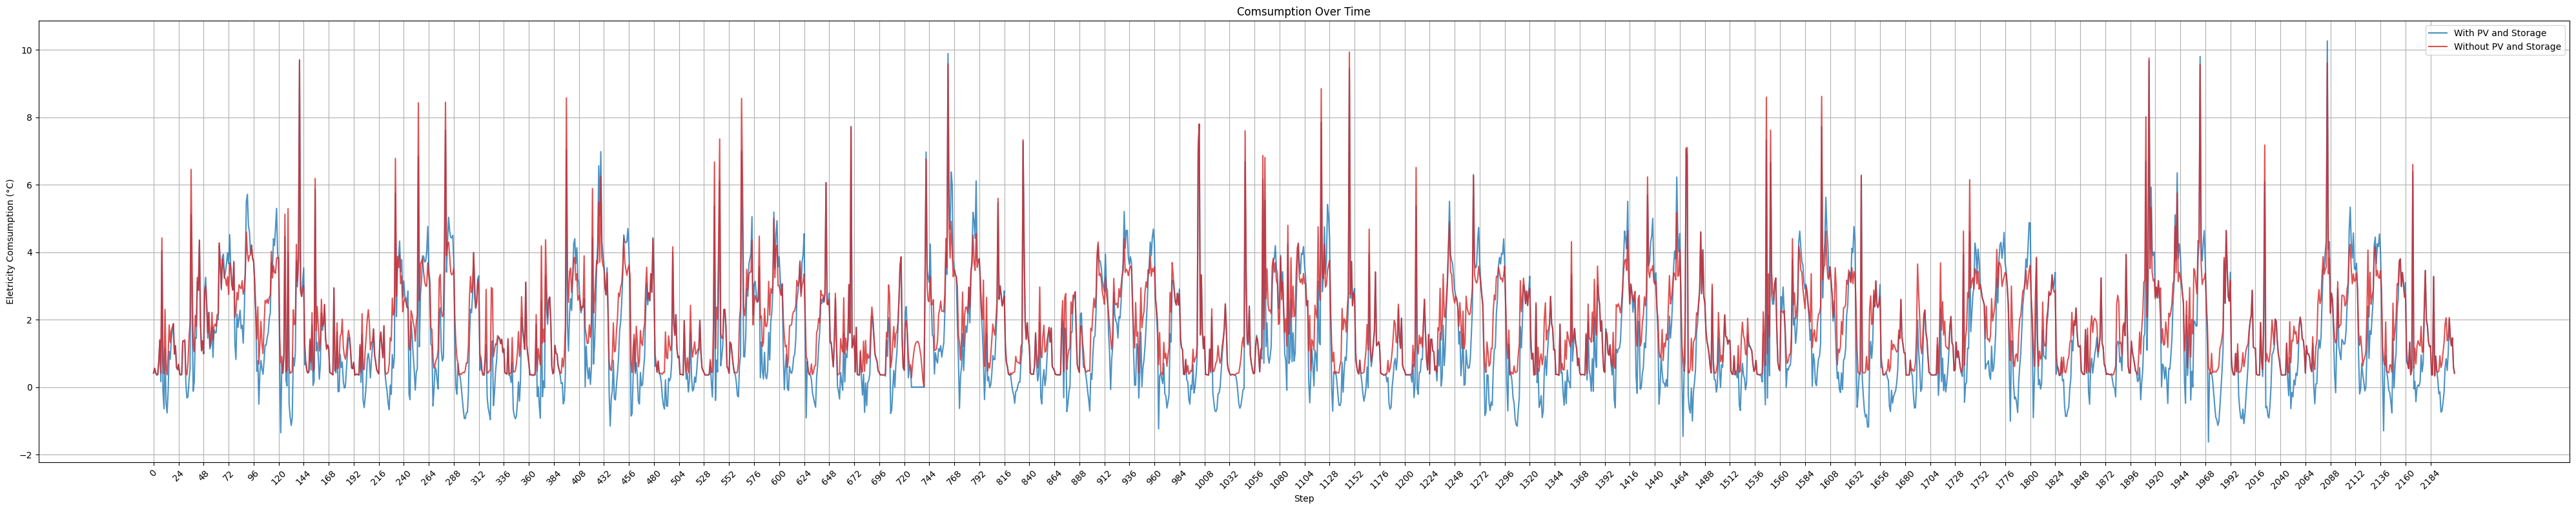

In [6]:
from utils import plotting_functions as plt

num_building = 0

#Calcola il consumo di elettricità totale dell'edificio
energy_with_pv= eval_env.buildings[num_building].net_electricity_consumption
energy_without_pv = eval_env.buildings[num_building].net_electricity_consumption_without_storage_and_pv

plt.plot_comparison_two(
    energy_with_pv,
    energy_without_pv,
    ylabel='Eletricity Comsumption (°C)',
    title='Comsumption Over Time',
    label1='With PV and Storage',
    label2='Without PV and Storage'
)

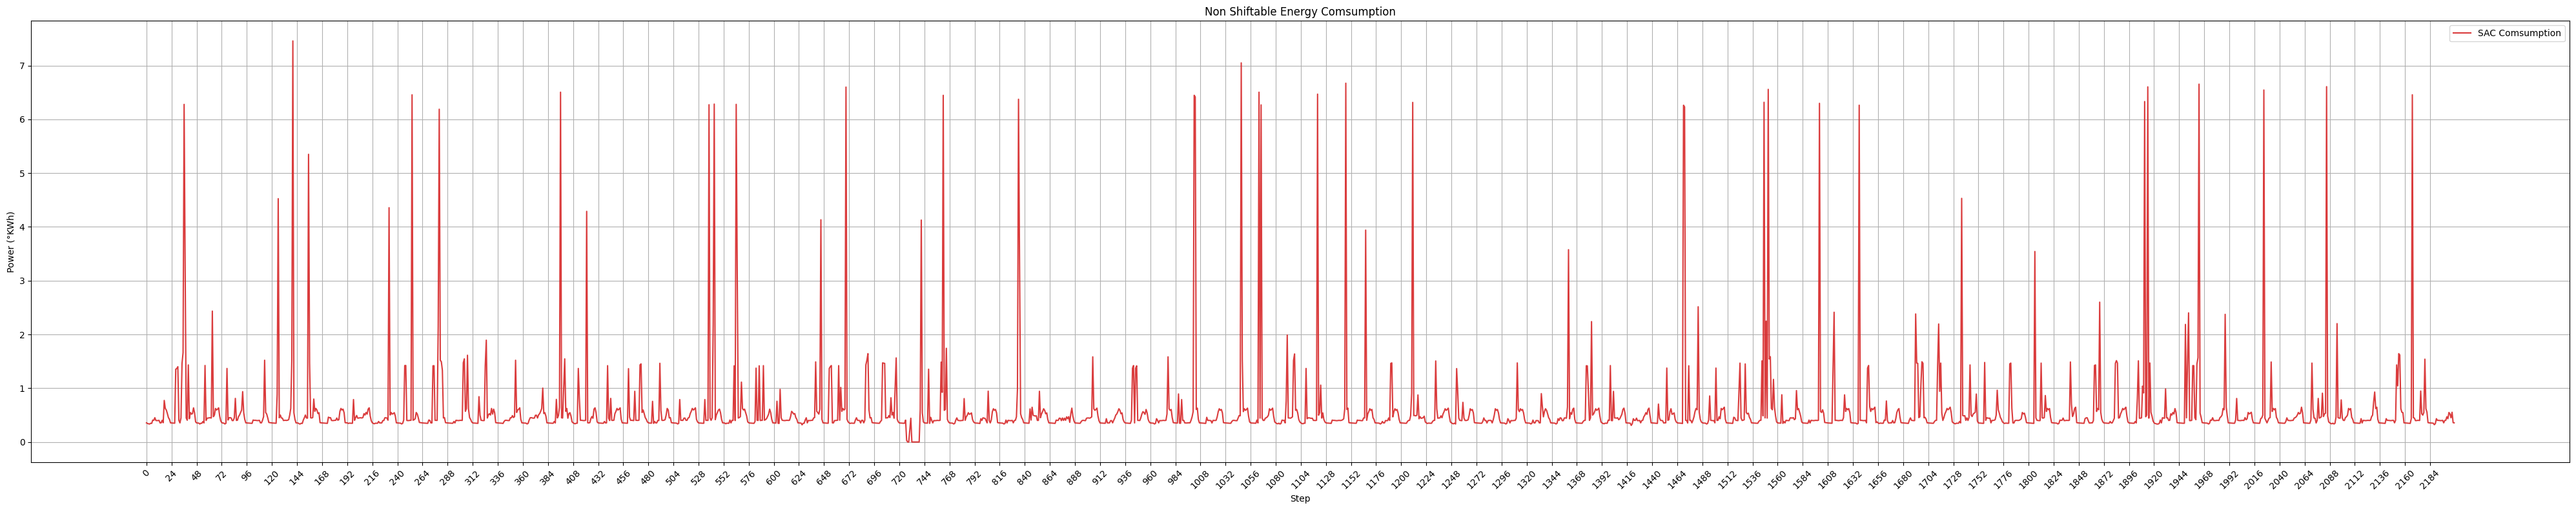

In [7]:

non_energy_sac = eval_env.buildings[num_building].non_shiftable_load_electricity_consumption

plt.plot_single_agent(
    non_energy_sac,
    ylabel='Power (°KWh)',
    title='Non Shiftable Energy Comsumption',
    label='SAC Comsumption',

)


------

## **Comportamento delle temperature**

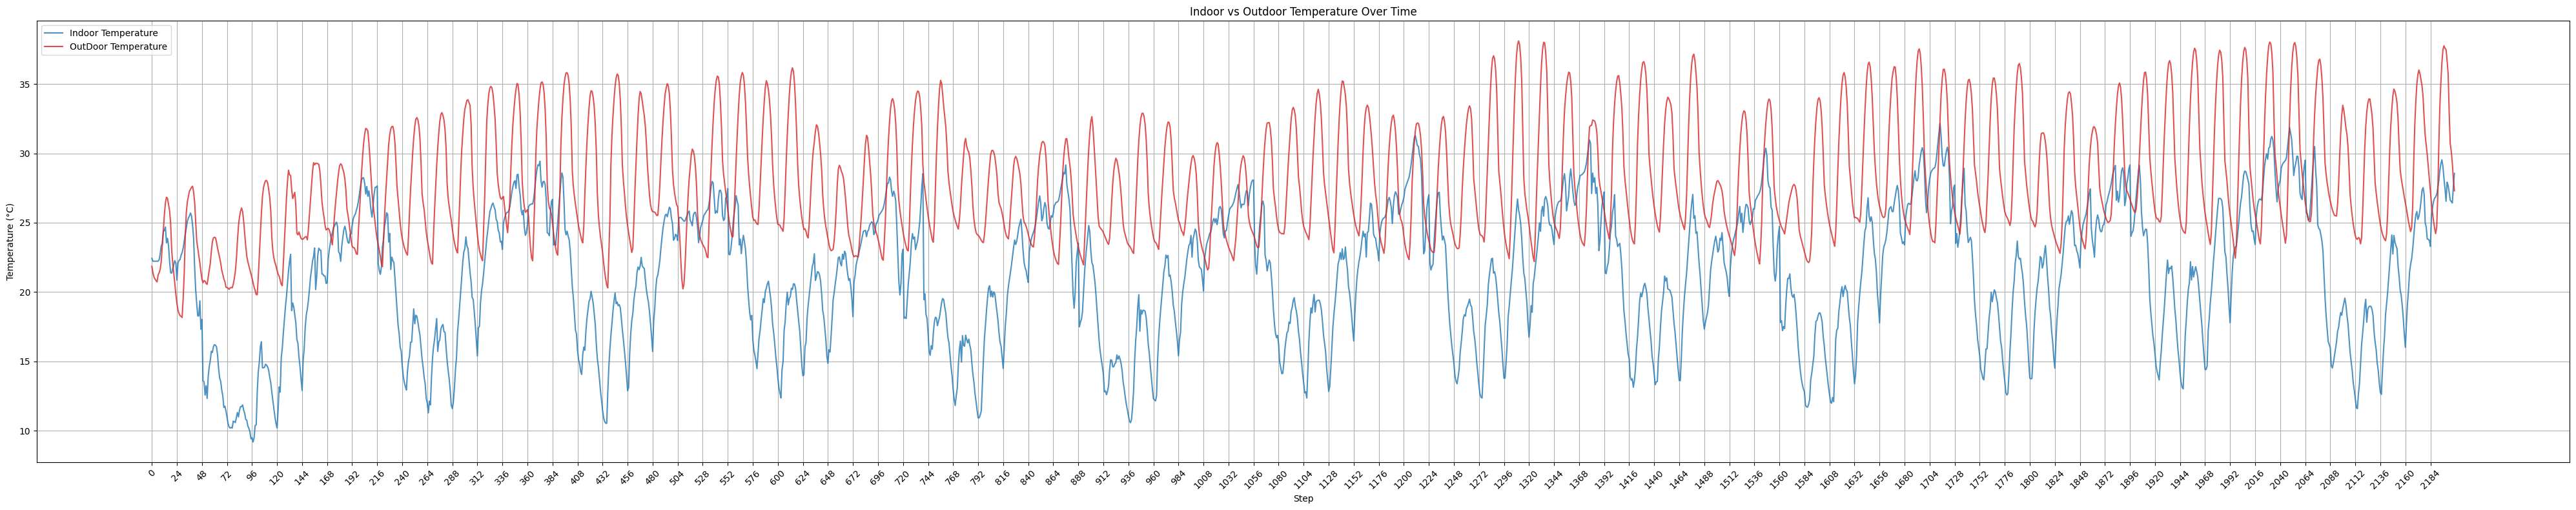

In [8]:
indoor_base_temp = eval_env.buildings[num_building].indoor_dry_bulb_temperature
outdoor_temp = eval_env.buildings[num_building].weather.outdoor_dry_bulb_temperature


plt.plot_comparison_two(
    indoor_base_temp,
    outdoor_temp,
    ylabel='Temperature (°C)',
    title='Indoor vs Outdoor Temperature Over Time',
    label1='Indoor Temperature',
    label2='OutDoor Temperature'
)


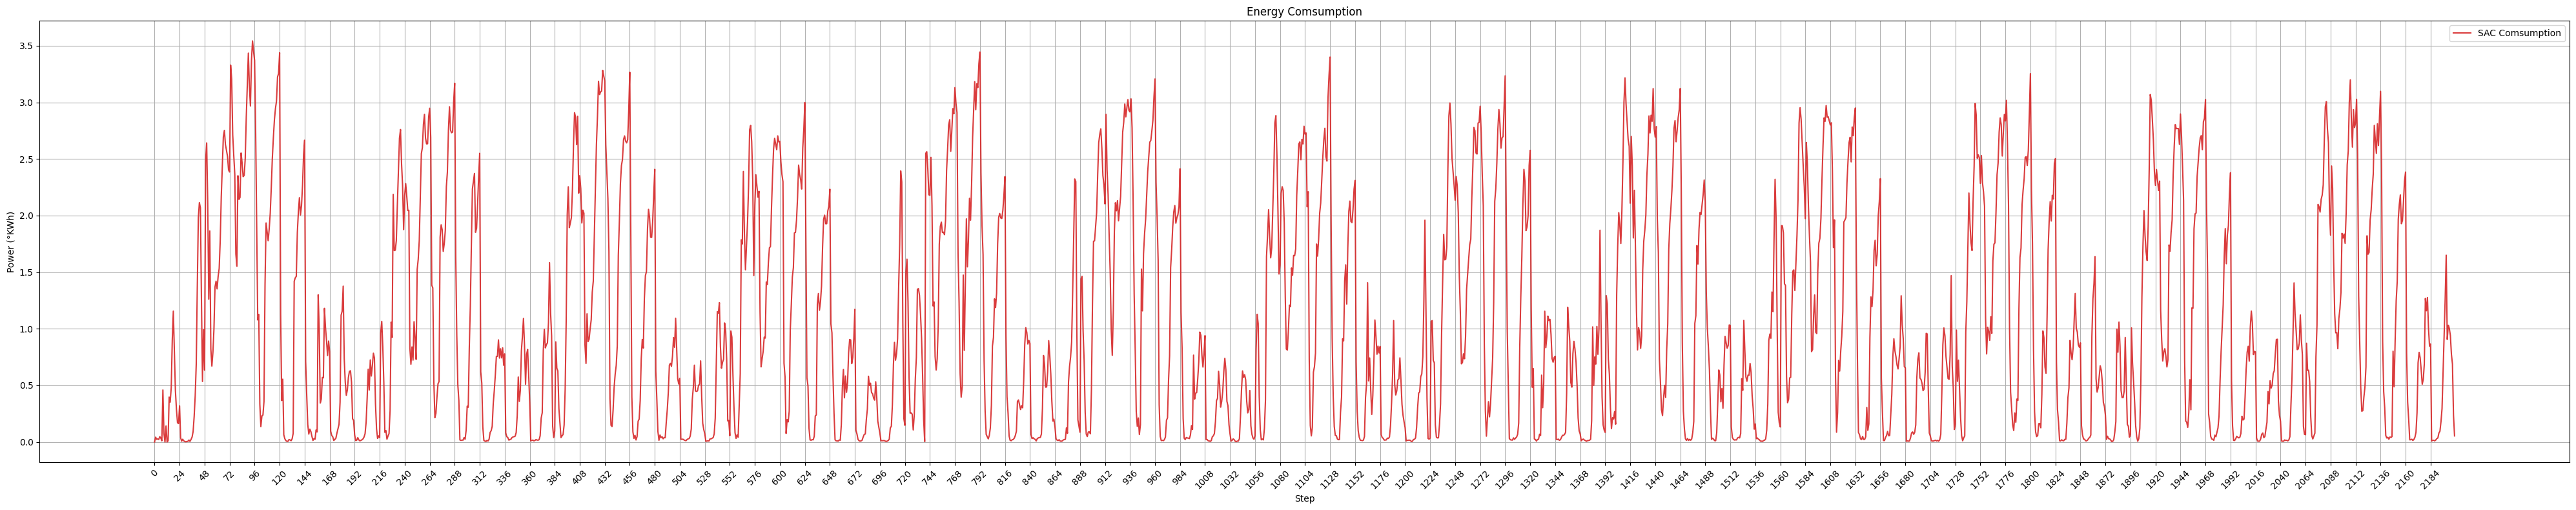

In [9]:
#Questa componente estrae la potenza utilizzata dei dispositivi che servono per regolare la temperatura ambientale

cooler_energy_sac = eval_env.buildings[num_building].cooling_electricity_consumption

plt.plot_single_agent(
    cooler_energy_sac,
    ylabel='Power (°KWh)',
    title='Energy Comsumption',
    label='SAC Comsumption',

)


----

## **Comportamento nell'utilizzo delle batterie**

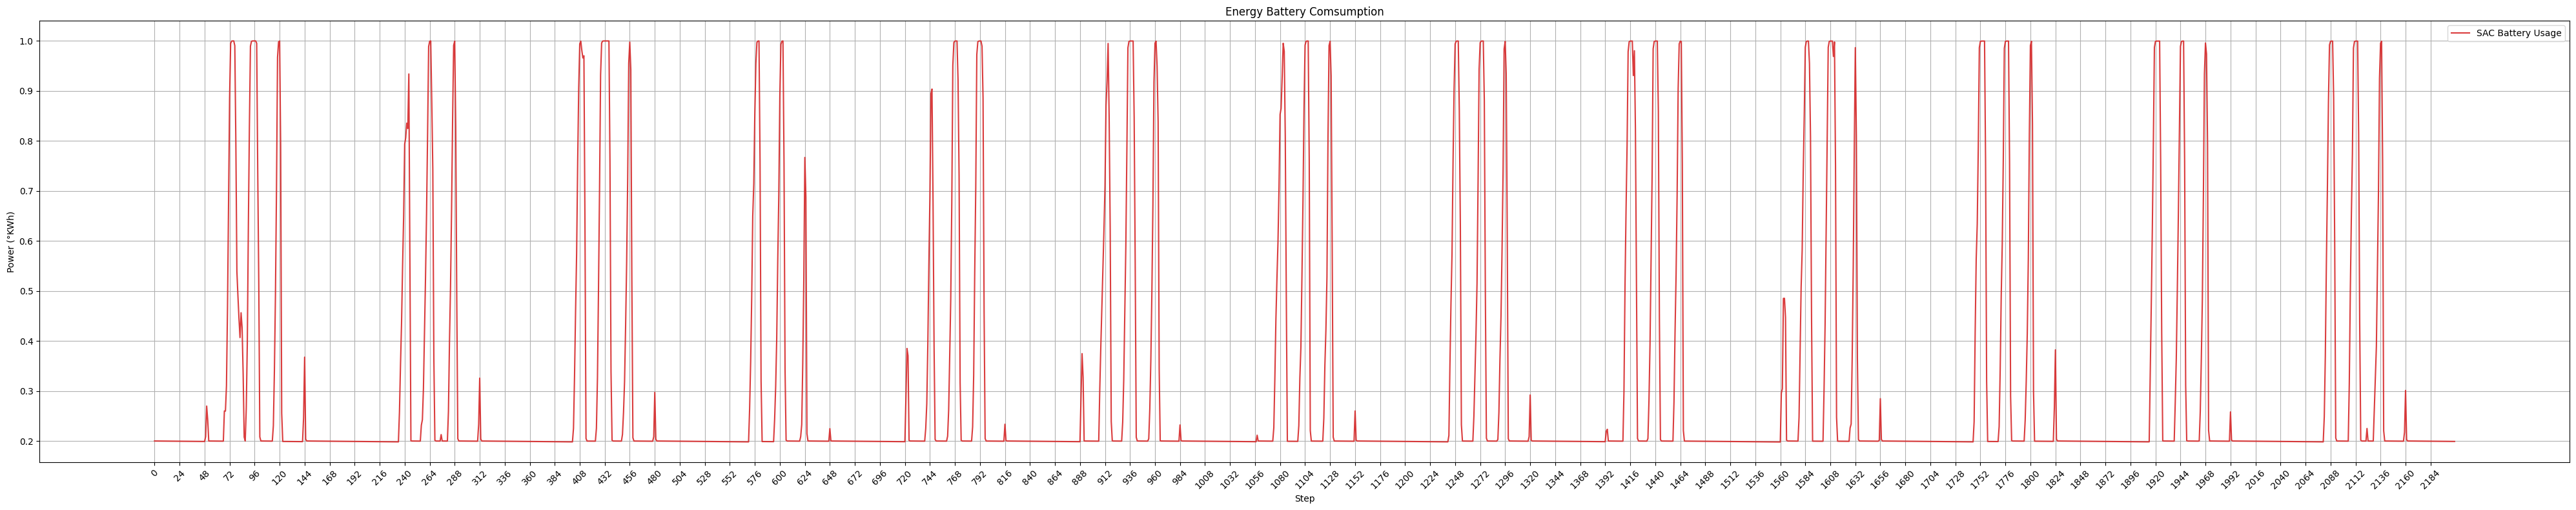

In [10]:
agent_data1 = eval_env.buildings[num_building].electrical_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)

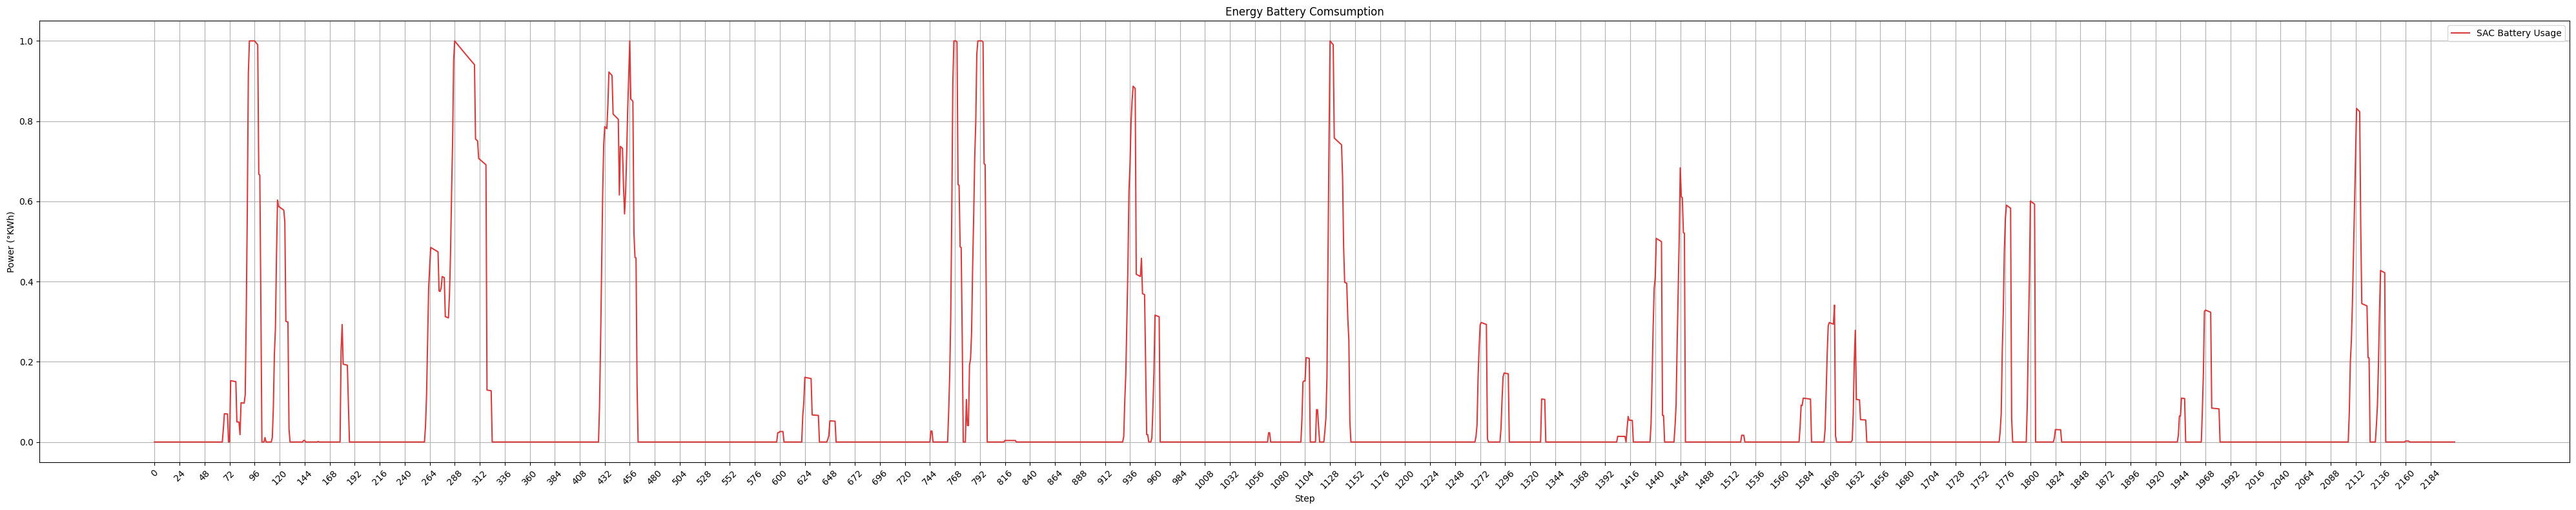

In [11]:
agent_data1 = eval_env.buildings[num_building].dhw_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)


----

## **Comportamento delle emissioni**

L'emissioni sono strettamente legate ai consumi di energia della rete, perciò le caratteristiche precedenti si propagano anche qua.

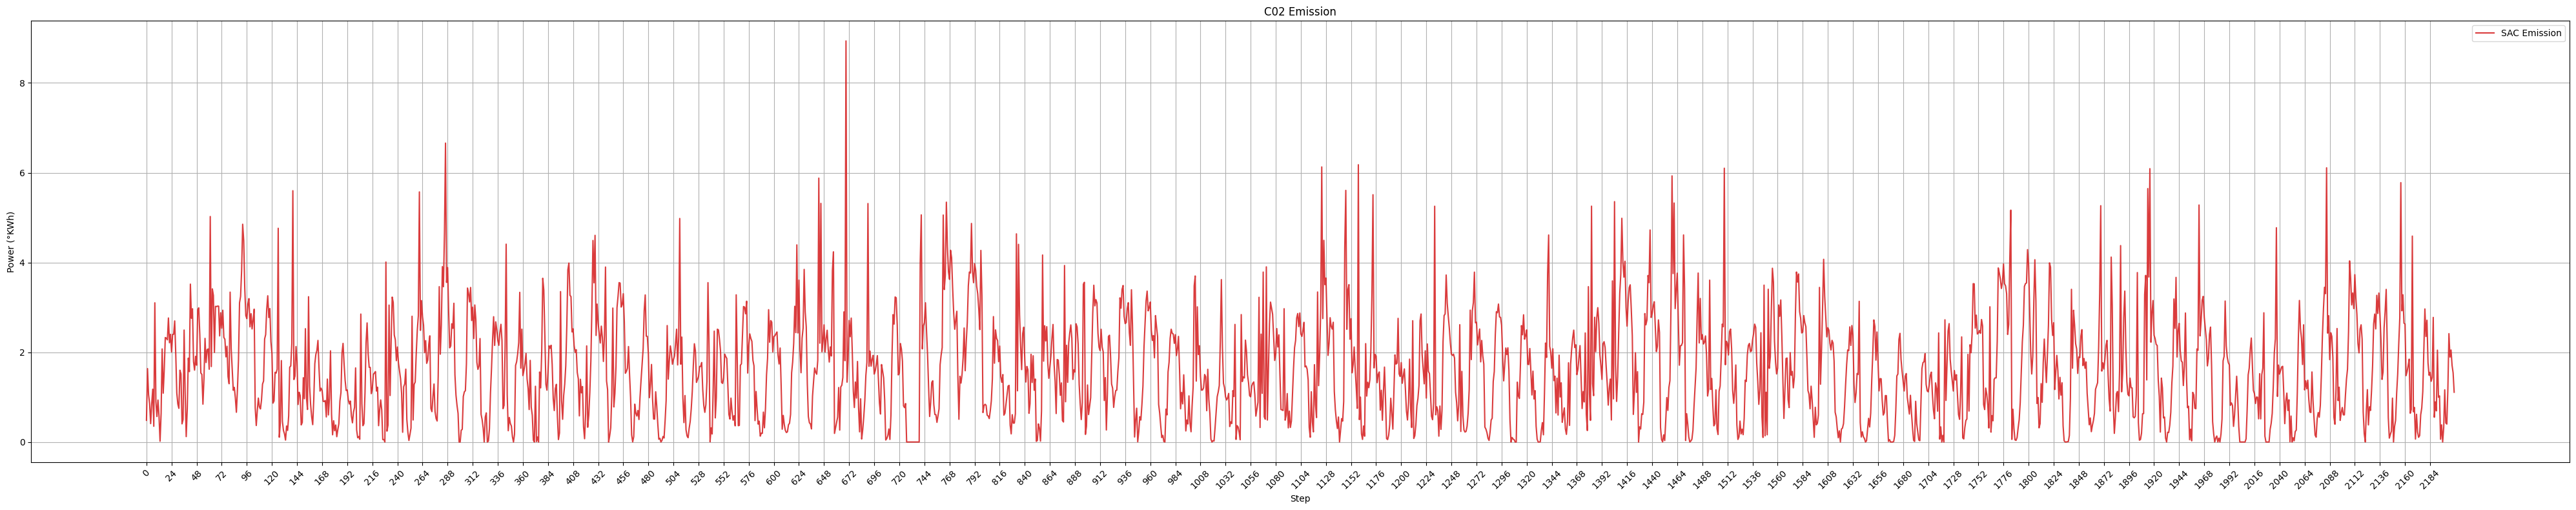

In [12]:
agent_data1 = eval_env.net_electricity_consumption_emission


plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='C02 Emission',
    label='SAC Emission'
)


----

## **Comportamento dei reward e dell'apprendimento**



Episodio  Reward Min  Reward Max   Reward Somma  Reward Media
0         1 -266.006042   -1.699742 -211676.484375    -95.911407
1         2 -355.377716   -1.916136 -288437.937500   -130.692322
2         3 -224.518600   -0.438670  -96239.328125    -43.606403
3         4 -331.725677   -0.720157 -186099.312500    -84.322296

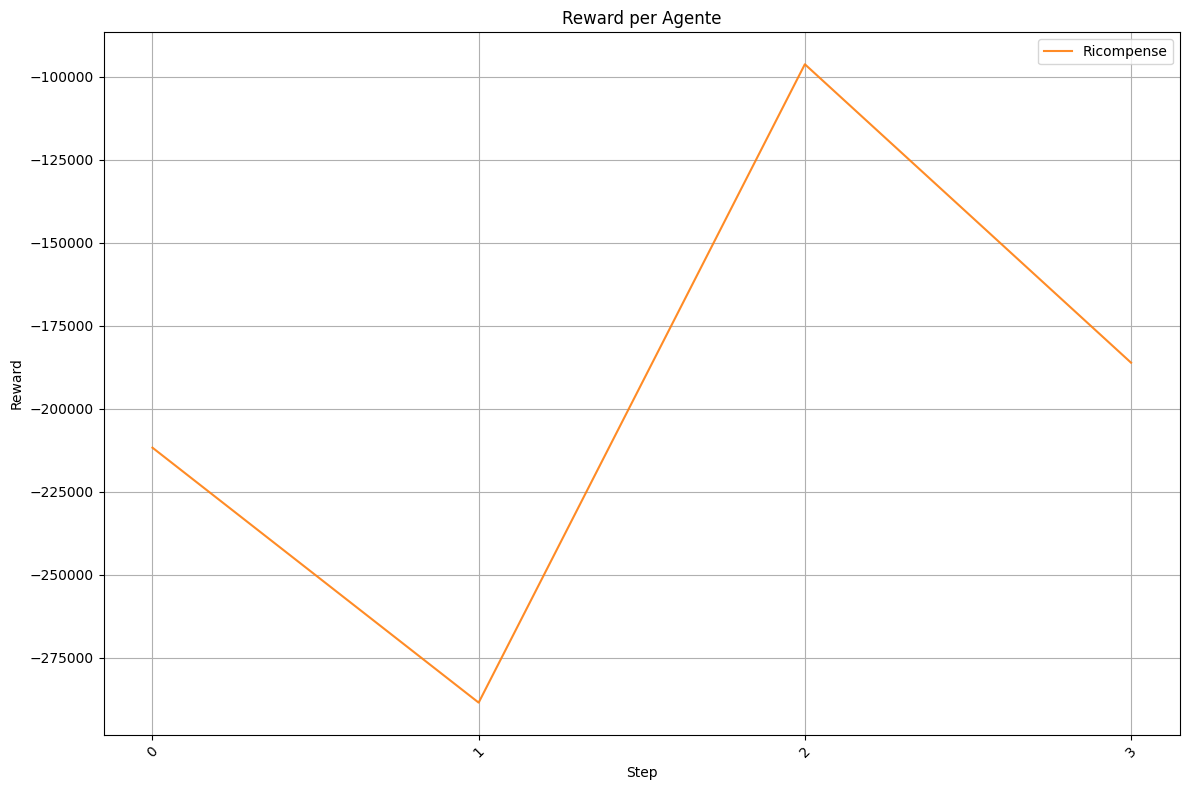

In [13]:
df = plt.create_episode_table(eval_env.episode_rewards)


display(df)

plt.plot_rewards(df['Reward Somma'])


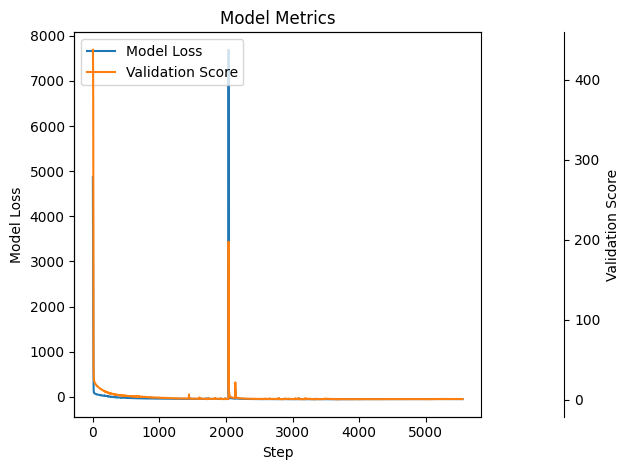

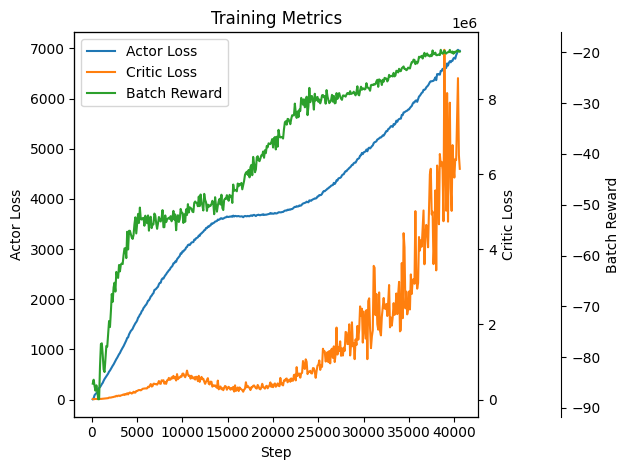

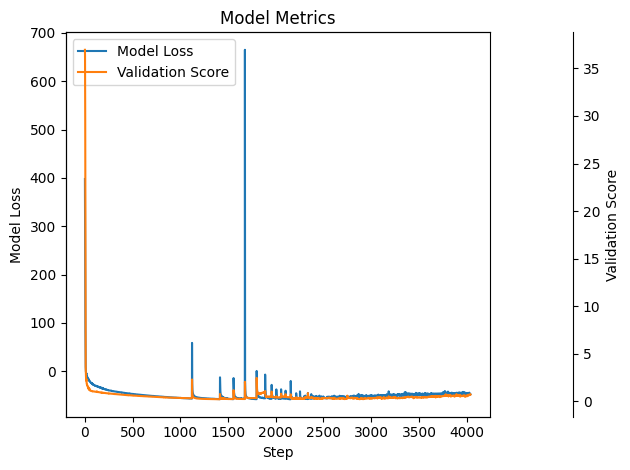

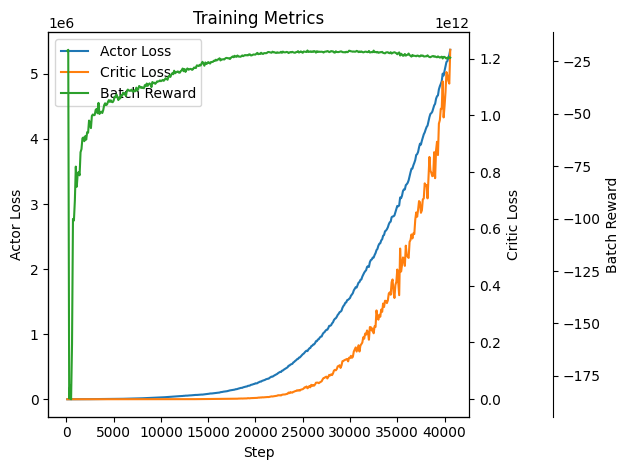

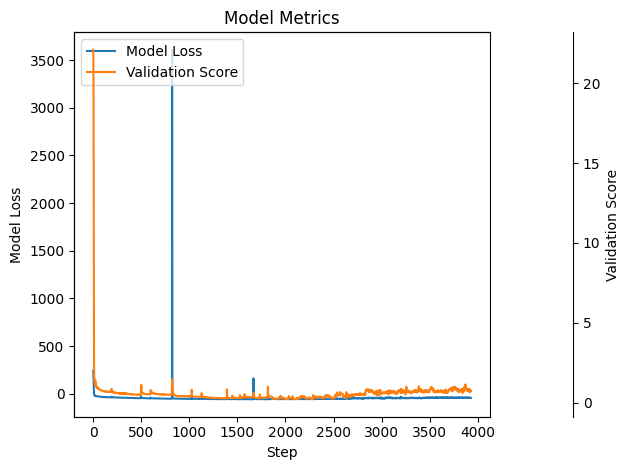

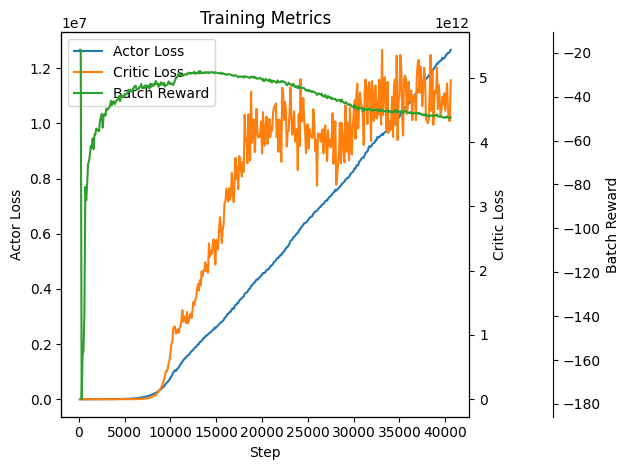

In [14]:
from utils import plotting_functions as plt
plt.plot_learning_metrics(os.getcwd()+"/exp/fmacura/building_0")
plt.plot_learning_metrics(os.getcwd()+"/exp/fmacura/building_1")
plt.plot_learning_metrics(os.getcwd()+"/exp/fmacura/building_2")


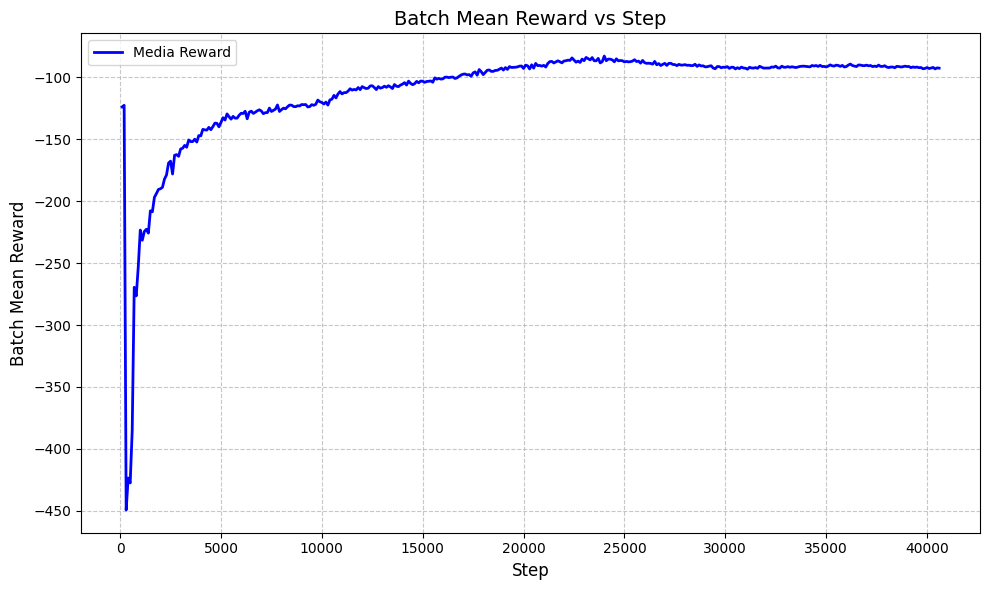

In [15]:
import csv
import matplotlib.pyplot as plt
import os

def plot_batch_mean_rewards(csv_path):
    steps = []
    mean_rewards = []
    min_rewards = []
    max_rewards = []
    num_buildings = []

    # Controlla se il file esiste
    if not os.path.exists(csv_path):
        print(f"Errore: Il file {csv_path} non esiste!")
        return

    with open(csv_path, newline='') as f:
        reader = csv.reader(f)
        header = next(reader, None)  # Leggi l'header

        # Controlla il formato del file
        if header and len(header) >= 5 and header[0] == "step" and header[1] == "batch_mean_reward":
            # Nuovo formato con min/max
            for row in reader:
                if len(row) >= 5:
                    try:
                        steps.append(int(row[0]))
                        mean_rewards.append(float(row[1]))
                        min_rewards.append(float(row[2]))
                        max_rewards.append(float(row[3]))
                        num_buildings.append(int(row[4]))
                    except ValueError:
                        print(f"Warning: Saltata riga con dati non validi: {row}")
        else:
            # Vecchio formato
            f.seek(0)  # Torna all'inizio del file
            next(reader, None)  # Salta l'header se presente
            for row in reader:
                if len(row) >= 2:
                    try:
                        steps.append(int(row[0]))
                        mean_rewards.append(float(row[1]))
                    except ValueError:
                        print(f"Warning: Saltata riga con dati non validi: {row}")

    if not steps:
        print("Nessun dato valido trovato nel file!")
        return

    plt.figure(figsize=(10, 6))

    # Plot della media
    plt.plot(steps, mean_rewards, 'b-', linewidth=2, label='Media Reward')

    plt.xlabel("Step", fontsize=12)
    plt.ylabel("Batch Mean Reward", fontsize=12)
    plt.title("Batch Mean Reward vs Step", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

    plt.show()

# Esempio di utilizzo
plot_batch_mean_rewards(os.path.join(os.getcwd(), "exp", "fmacura", "overall_batch_rewards.csv"))